### Instacart 4.10 part 1 of 2 Coding etiquette<br>

Address PII data<br>
Compare Customers by region<br>
Compare Customer parent types<br>
New df = c_o_p410; transform to add 'max order' column and create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.<br>

### histogram of income levels<br>
Bar of frequency of department ids<br>
Bar of popular products by region

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# /* Create path (to project file), import 4.9 pickle file */
path = r'/Users/margoshogren/Desktop/1 Margo-CF Folder -desktop/4 Python/4-2023 Instacart Basket Analysis'
c_o_p49 = pd.read_pickle(os.path.join(path,'2 Data','prepared data','c_o_p_49_2b.pkl'))

In [3]:
c_o_p49.columns

Index(['user_id', 'First_Name', 'Last_Name', 'Gender', 'State', 'Age',
       'date_joined', 'no_of_dep', 'Marital_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'Busiest_days', 'busiest_period_of_day',
       'max_order'],
      dtype='object')

### Question(2) address any PII data in the data before continuing your analysis<br>
The columns that could be PII are 'Marital_status' and 'income', we should bring this to the attention of the senior staff or the client.

### Question(3) comparing customer behavior in different geographic areas.

In [4]:
c_o_p49.head()

,user_id,First_Name,Last_Name,Gender,State,Age,date_joined,no_of_dep,Marital_status,income,...,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_days,busiest_period_of_day,max_order
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,9,30.0,2,0,both,Mid-range product,Busiest days,Average orders,8
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,5,15,11.0,1,1,both,Mid-range product,Regularly busy,Most orders,8
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,15,10.0,2,1,both,Mid-range product,Busiest days,Most orders,8
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,2,9,NaN,1,0,both,Low-range product,Regularly busy,Average orders,8
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,3,11,30.0,2,1,both,Low-range product,Least busy,Most orders,8


#### create regions: (Northeast, Midwest, South, West) using .loc

In [5]:

c_o_p49.loc[c_o_p49['State'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']),'Regions'] = 'Northeast'  
c_o_p49.loc[c_o_p49['State'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']),'Regions'] = 'Midwest'   
c_o_p49.loc[c_o_p49['State'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']) ,'Regions'] = 'South' 
c_o_p49.loc[c_o_p49['State'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']),'Regions'] = 'West'                   

In [6]:
c_o_p49['Regions'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Regions, dtype: int64

#### Observation: the South has the most customers

#### Check that the rows match for Regions created and the df

In [7]:
c_o_p49.shape

(32404859, 28)

In [8]:
#check if length = df length
len(c_o_p49['Regions'])

32404859

### What is the average orders per region?

In [9]:
c_o_p49.groupby('Regions')['order_number'].mean()

Regions
Midwest      16.925132
Northeast    17.215730
South        17.150968
West         17.279318
Name: order_number, dtype: float64

#### The West has the highest average number of orders, however there is not a big difference between regions.

In [10]:
regions_ord = c_o_p49.groupby('Regions')['order_number'].mean()

In [11]:
regions_ord.reset_index()

,Regions,order_number
0,Midwest,16.925132
1,Northeast,17.215730
2,South,17.150968
3,West,17.279318


In [12]:
df_new = regions_ord.reset_index()

## Bar chart for average orders by region

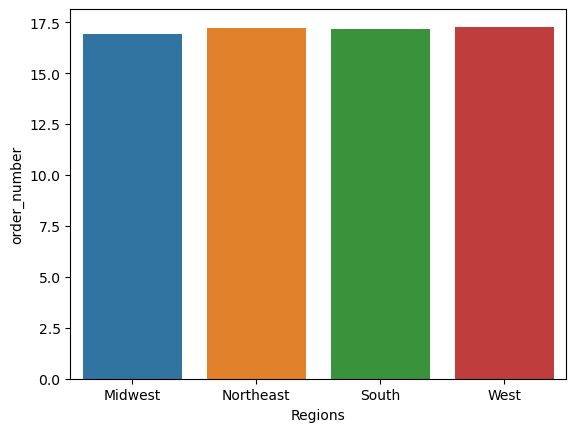

In [13]:
bar_regions = sns.barplot(x = 'Regions', y = 'order_number',data = df_new)
plt.show()

#### Observation: There is very little difference for average orders by region, West is slightly highest

In [14]:
c_o_p49.groupby('Regions')['prices'].mean()

Regions
Midwest      7.791784
Northeast    7.781639
South        7.794065
West         7.789549
Name: prices, dtype: float64

#### The South has ordered slightly higher priced items. There is not a significant difference between regions.

In [92]:
c_o_p49['Average_order']= c_o_p49.groupby(['Regions'])['prices'].transform(np.max)

In [93]:
# Check columns transformed
c_o_p49[['Regions','prices','Average_order']]

,Regions,prices,Average_order
0,Midwest,9.0,25.0
1,Midwest,9.0,25.0
2,Midwest,9.0,25.0
3,Midwest,4.3,25.0
4,Midwest,4.3,25.0
...,...,...,...
32404854,Northeast,4.7,25.0
32404855,Northeast,1.8,25.0
32404856,Northeast,4.0,25.0
32404857,Northeast,2.0,25.0


In [16]:
c_o_p49.columns

Index(['user_id', 'First_Name', 'Last_Name', 'Gender', 'State', 'Age',
       'date_joined', 'no_of_dep', 'Marital_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'Busiest_days', 'busiest_period_of_day', 'max_order',
       'Regions'],
      dtype='object')

### Question(4) 
Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [6]:
c_o_p49['max_order']= c_o_p49.groupby(['user_id'])['order_number'].transform(np.max)

In [7]:
c_o_p49.loc[c_o_p49['max_order'] < 5, '<_5_order'] = 'exclude'

In [8]:
c_o_p49.loc[c_o_p49['max_order'] >= 5, '<_5_order'] = 'include'

In [9]:
# Check result of 'yes' orders < 5 to include and 'no' orders < 5 to exclude
c_o_p49['<_5_order'].value_counts(dropna = False)

include    30964564
exclude     1440295
Name: <_5_order, dtype: int64

#### New df  [c_o_p410] will exclude the orders < 5

In [10]:
c_o_p410 = c_o_p49[c_o_p49['<_5_order'] == 'include']

#### Observation: The new df = c_o_p410 is now the size of the 'include' (orders < 5)

### Question(5) Create a profiling variable based on:<br>
-age<br>
-income<br>
-“department_id” columns-certain goods<br>
-number of dependents<br>
You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

### Profile parent age groups and non parent; label 'parent types' as:<br>
'young parent' as less and equal 25 & dependents<br>
'mid age parent' as 26-40 & dependents <br>
'older parent' as > 40 & dependents<br>
'non parent' with no dependents

In [22]:
c_o_p410.loc[(c_o_p410['no_of_dep'] > 0) & (c_o_p410['Age'] <= 25), 'parent_type'] = 'young parent'

/var/folders/dj/4qjrg2bn07928wblcylhwx240000gn/T/ipykernel_14326/2465522761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_o_p410.loc[(c_o_p410['no_of_dep'] > 0) & (c_o_p410['Age'] <= 25), 'parent_type'] = 'young parent'


In [23]:
c_o_p410.loc[(c_o_p410['no_of_dep'] > 0) & (c_o_p410['Age'] >= 40), 'parent_type'] = 'older parent'

In [24]:
c_o_p410.loc[(c_o_p410['no_of_dep'] > 0) & ((c_o_p410['Age'] > 25) & (c_o_p410['Age'] < 40)), 'parent_type'] = 'mid age parent'

In [25]:
c_o_p410.loc[(c_o_p410['no_of_dep'] == 0), 'parent_type'] = 'non parent'

In [26]:
#check result of labeling to young parent, older parent, mid age parent, non parent
c_o_p410['parent_type'].value_counts(dropna = False).sort_index()

mid age parent     5093244
non parent         7739681
older parent      15220348
young parent       2911291
Name: parent_type, dtype: int64

### Question(6) Create an appropriate visualization to show the distribution of profiles.

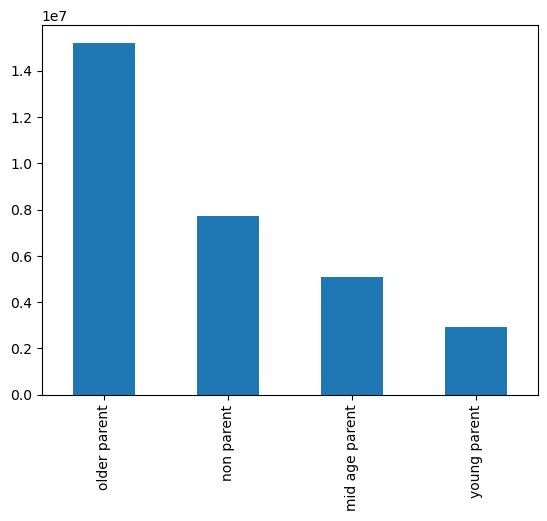

In [27]:
#bar graph of parent types 
bar = c_o_p410['parent_type'].value_counts().plot.bar()

#### Observation: There are more customers as older parents (age >40), followed by 'non-parents', 'mid-age' (26-40) and lastly 'young parents' (< 25)

<Axes: ylabel='Frequency'>

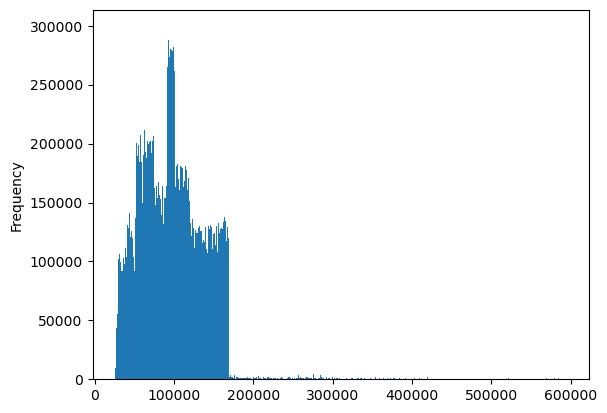

In [28]:
#Create a histogram for the income levels
c_o_p410['income'].plot.hist(bins = 800)

#### Observation: the histogram shows the most customers income is 50k-150k.

([<matplotlib.axis.XTick at 0x7f9147fe0250>,
 [Text(0, 0, 'produce'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'snacks'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'frozen'),
  Text(5, 0, 'pantry'),
  Text(6, 0, 'bakery'),
  Text(7, 0, 'canned goods'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'household'),
  Text(11, 0, 'meat seafood'),
  Text(12, 0, 'breakfast'),
  Text(13, 0, 'personal care'),
  Text(14, 0, 'babies'),
  Text(15, 0, 'international'),
  Text(16, 0, 'alcohol'),
  Text(17, 0, 'pets'),
  Text(18, 0, 'missing'),
  Text(19, 0, 'other'),
  Text(20, 0, 'bulk')])

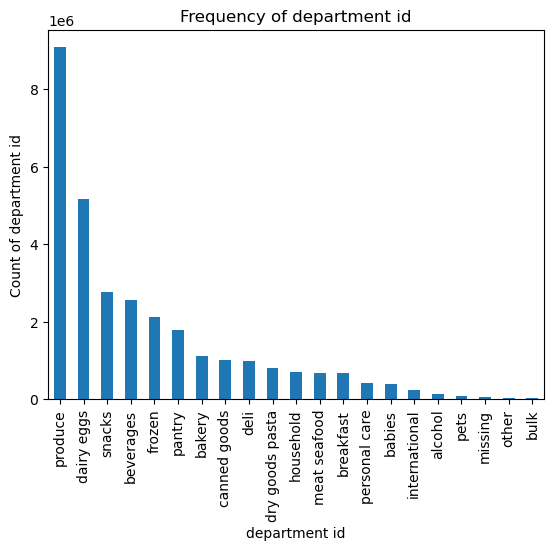

In [22]:
#Create a bar graph of 'department_id'
bar_inc = c_o_p410['department_id'].value_counts().plot.bar()
plt.xlabel('department id')
plt.ylabel('Count of department id')
plt.title('Frequency of department id')
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20),('produce','dairy eggs','snacks','beverages','frozen','pantry','bakery','canned goods','deli','dry goods pasta','household','meat seafood','breakfast','personal care','babies','international','alcohol','pets','missing','other','bulk'))

#### Observation: The most frequent department_id's ordered are 4 (produce), 16 (dairy eggs) and the least are 10 (bulk), 2 (other)

### Question(7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

#### Frequency of parent_type orders

In [30]:
c_o_p410.groupby('parent_type').agg({'order_number':['mean','max','min']})

order_number        
                       mean max min
parent_type                        
mid age parent    17.875102  99   1
non parent        17.957922  99   1
older parent      17.735680  99   1
young parent      17.948170  99   1

#### Income mean, max and min by parent_type 

In [31]:
c_o_p410.groupby('parent_type').agg({'income':['mean','max','min']})

income               
                         mean     max    min
parent_type                                 
mid age parent   70590.945681  397929  25911
non parent       99896.801937  584097  25903
older parent    114804.991516  593901  26154
young parent     70876.285097  396364  25937

In [32]:
c_o_p410['Gender'].value_counts(dropna = False)

Male      15586740
Female    15377824
Name: Gender, dtype: int64

#### Observation: There are slightly more males customers than female.

### Question(8) Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions.

In [33]:
c_o_p410.groupby('Regions').agg({'income':['mean','max','min']})

income               
                    mean     max    min
Regions                                
Midwest    100380.647818  579397  25903
Northeast   99745.286352  584097  26095
South       99242.561807  591089  25911
West        99546.021028  593901  25937

#### Observation: Midwest region has the highest income

In [34]:
c_o_p410.groupby('Regions').agg({'department_id':['mean','max','min']})

department_id        
                   mean max min
Regions                        
Midwest        9.916122  21   1
Northeast      9.942898  21   1
South          9.912321  21   1
West           9.926993  21   1

In [35]:
c_o_p410['Regions'].value_counts(dropna = False)

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: Regions, dtype: int64

In [ ]:
#### Observation: The South has the most customers

### What are the most frequent products ordered?

In [36]:
c_o_p410['product_name'].value_counts(dropna = False).head()

Banana                    453164
Bag of Organic Bananas    366403
Organic Strawberries      255988
Organic Baby Spinach      231772
Organic Hass Avocado      206799
Name: product_name, dtype: int64

In [37]:
pop_prod = c_o_p410['product_name'].value_counts(dropna = False).head()

In [38]:
pop_prod2 = pop_prod.reset_index()

In [39]:
pop_prod2.head()

,index,product_name
0,Banana,453164
1,Bag of Organic Bananas,366403
2,Organic Strawberries,255988
3,Organic Baby Spinach,231772
4,Organic Hass Avocado,206799


In [46]:
#re-name the index
pop_prod3 = pop_prod2.rename(columns = {'index':'Product_name','product_name':'Count'})

In [47]:
pop_prod3.columns

Index(['Product_name', 'Count'], dtype='object')

In [54]:
pop_prod3.dtypes

Product_name    object
Count            int64
dtype: object

### Bar plot of most popular products ordered

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banana'),
  Text(1, 0, 'Bag of Organic Bananas'),
  Text(2, 0, 'Organic Strawberries'),
  Text(3, 0, 'Organic Baby Spinach'),
  Text(4, 0, 'Organic Hass Avocado')])

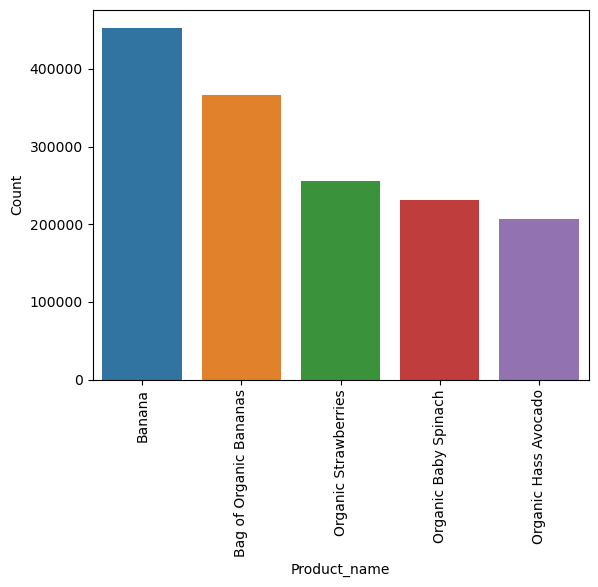

In [102]:
popprod_bar = sns.barplot(data=pop_prod3, x="Product_name", y="Count")
plt.xticks(rotation = 90)

#### Observation: Bananas are the most popular product ordered

In [132]:
#groupby regions, product name and use size to count for a plot
reg_prod = c_o_p410.groupby(['Regions', 'product_name']).size().sort_values(ascending = False).reset_index(name = 'counts').head(20)

### What are the popular products purchased per region?

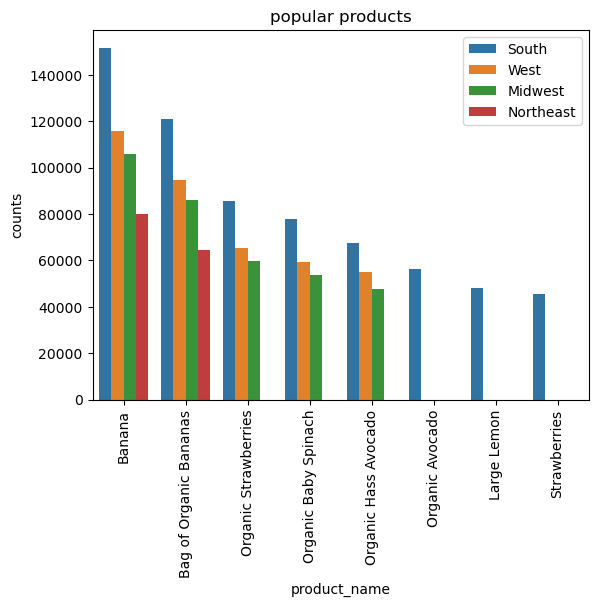

In [134]:
coolbar = sns.barplot(y ='counts', x = 'product_name',hue = 'Regions', data = reg_prod)
plt.xticks(rotation = 90) 
plt.title('popular products')
plt.legend(loc=1) 

#### Observation: All regions are ordering bananas the most, and the South is ordering the most products

In [ ]:
#Export visualization of popular dept ids
bar_inc.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_id.png'))

In [ ]:
#Export visualization of regions
bar_regions.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scat_age_inc.png'))

In [103]:
#Export visualization of popular product names
popprod_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scat_age_inc.png'))

In [135]:
#Export visualization of popular product names per region
coolbar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scat_age_inc.png'))

In [136]:
#Export c_o_p_410 to pickle
c_o_p410.to_pickle(os.path.join(path,'2 Data','prepared data','c_o_p410.pkl'))

#### -End of 4.10 Part 1 Python coding etiquette